<a href="https://colab.research.google.com/github/BaskaranV15/CODSOFT/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
df=pd.read_csv("/content/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [136]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [137]:
df.duplicated().sum()

0

<Axes: xlabel='TV', ylabel='Sales'>

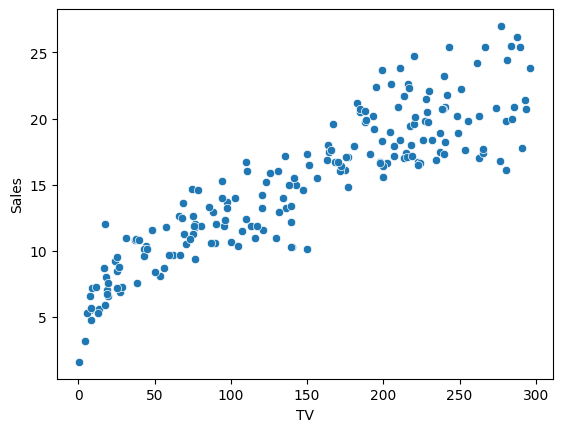

In [138]:
sns.scatterplot(data=df,x='TV',y='Sales')

<Axes: xlabel='Radio', ylabel='Sales'>

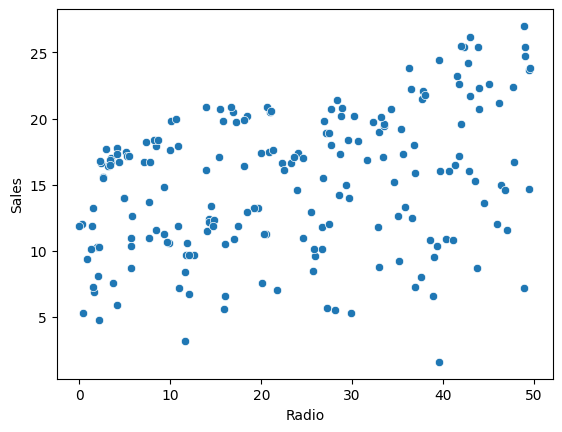

In [139]:
sns.scatterplot(data=df,x='Radio',y='Sales')

<Axes: xlabel='Newspaper', ylabel='Sales'>

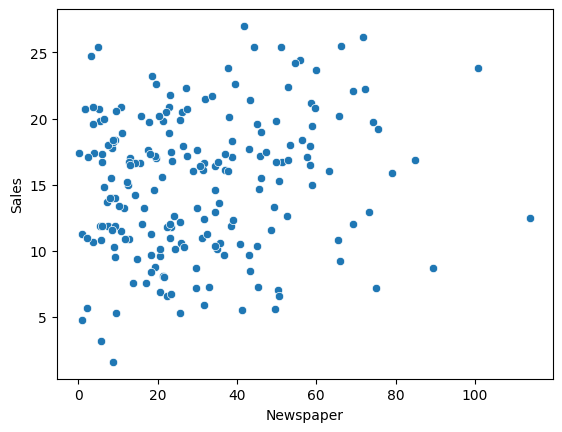

In [140]:
sns.scatterplot(data=df,x='Newspaper',y='Sales')

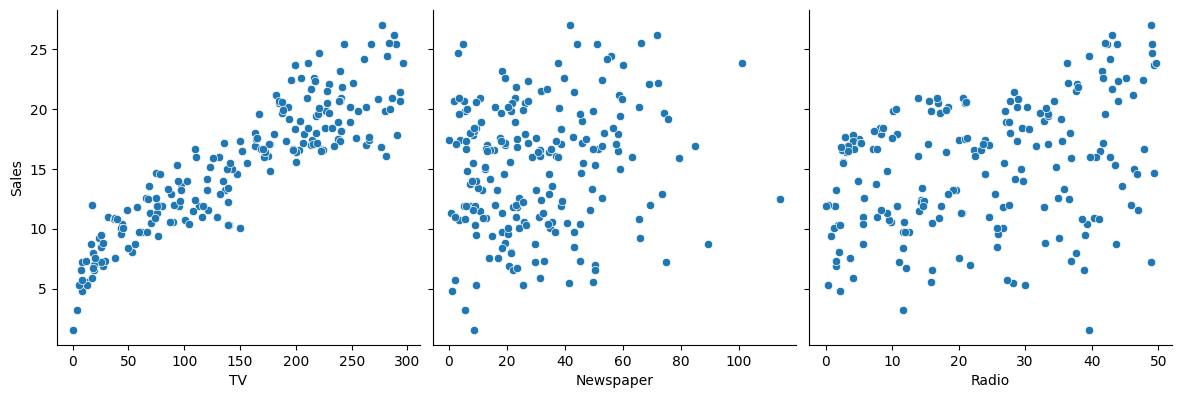

In [141]:
sns.pairplot(data=df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [142]:
correlation=df.corr()

<Axes: >

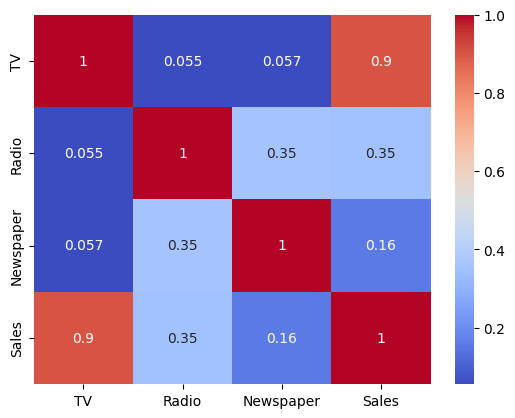

In [143]:
sns.heatmap(data=correlation,annot=True,cmap='coolwarm')

<Axes: ylabel='Density'>

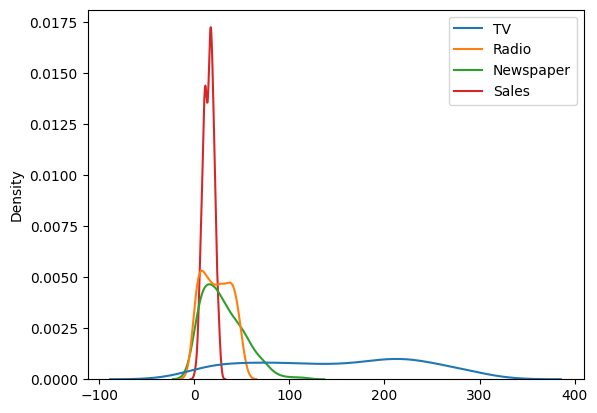

In [144]:
sns.kdeplot(data=df)

<Axes: xlabel='TV', ylabel='Sales'>

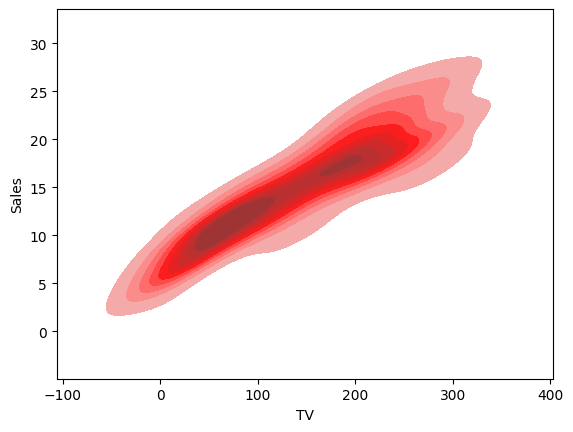

In [145]:
sns.kdeplot(data=df,x='TV',y='Sales',color='red',fill=True)

In [146]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [147]:
x=df.iloc[:,:-1]

In [148]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [149]:
y=df.iloc[:,-1]

In [150]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

<Axes: >

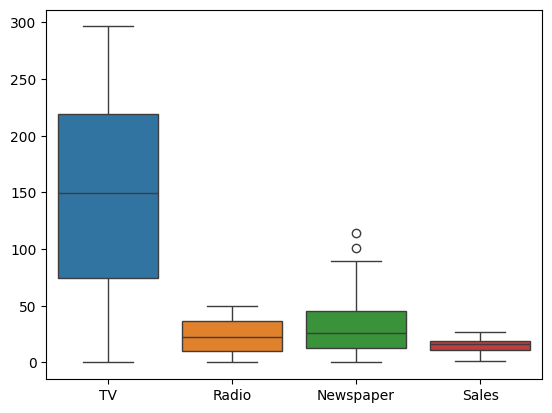

In [151]:
sns.boxplot(data=df)

In [152]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [153]:
x_train.shape

(160, 3)

In [154]:
x_test.shape

(40, 3)

In [155]:
y_train.shape

(160,)

In [156]:
y_test.shape

(40,)

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
reg=LinearRegression()

In [159]:
reg.fit(x_train,y_train)

LinearRegression()

In [160]:
values=eval(input("enter a prediction value: of Tv, Radio,Newspaper"))

enter a prediction value: of Tv, Radio,Newspaper[[230.5,37.8,69.2]]


In [161]:
y_predict=reg.predict(x_test)

In [162]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [163]:
mse=mean_absolute_error(y_test,y_predict)
print('MSE = ',mse)


MSE =  1.3995212905798706


In [164]:
reg.predict(values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21.30777658])

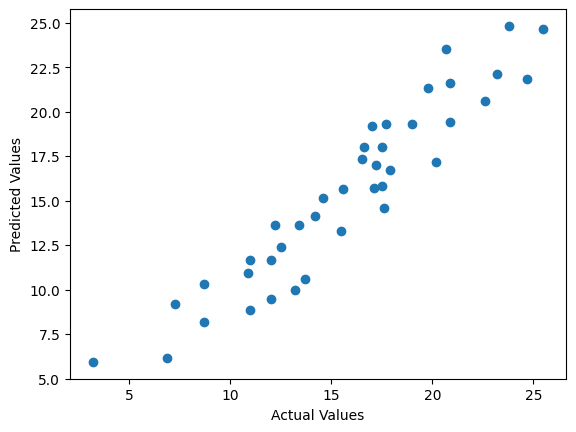

In [165]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [166]:
import statsmodels.api as sm

In [167]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(x_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [168]:
lr.params

const        4.427543
TV           0.054636
Radio        0.109255
Newspaper    0.002265
dtype: float64

In [169]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     497.2
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           1.35e-79
Time:                        16:37:49   Log-Likelihood:                -305.35
No. Observations:                 160   AIC:                             618.7
Df Residuals:                     156   BIC:                             631.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4275      0.344     12.858      0.0